<a href="https://colab.research.google.com/github/kcopp-crypto/Python/blob/main/Copp_DATA_342_Fall_2025_Lab_2_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Lab 1 and 2**: Using Descriptive Statistics and Hypothesis Testing to Evaluate Daily Returns between Nvidia and AMD



Step 1: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Step 2: Install Required Libraries

In [ ]:
!pip install openpyxl matplotlib pandas

Step 3: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Step 4: Load the Excel File


In [ ]:
import requests
import pandas as pd

file_id = '10UHOG_LRvrZj_gTzOGZa37Mrgxkd2SY7'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('Lab 1 - NVIDIA - AMD.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('Lab 1 - NVIDIA - AMD.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")

Step 5: Display Sample Rows

In [ ]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
0 2024-01-02   NVDA      48.14           NaN
1 2024-01-03   NVDA      47.55     -0.012256
2 2024-01-04   NVDA      47.97      0.008833
3 2024-01-05   NVDA      49.07      0.022931
4 2024-01-08   NVDA      52.23      0.064398


Step 6: Clean and Format the Data


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # Remove rows with missing returns

Step 7: Separate Walmart and COST Data

In [ ]:
nvda_df = df[df['Ticker'] == 'NVDA'].copy()
amd_df = df[df['Ticker'] == 'AMD'].copy()

Step 8: Display Sample Rows

In [ ]:
print("\nNvidia Daily Returns:")
print(nvda_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nAMD Daily Returns:")
print(amd_df[['Date', 'Adj Close', 'Daily Return']].head())


Nvidia Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      47.55     -0.012256
2 2024-01-04      47.97      0.008833
3 2024-01-05      49.07      0.022931
4 2024-01-08      52.23      0.064398
5 2024-01-09      53.11      0.016849

AMD Daily Returns:
          Date  Adj Close  Daily Return
252 2024-01-03     135.32     -0.023524
253 2024-01-04     136.01      0.005099
254 2024-01-05     138.58      0.018896
255 2024-01-08     146.18      0.054842
256 2024-01-09     149.26      0.021070


Step 9: Visualize Daily Returns with Box and Whisker Plots

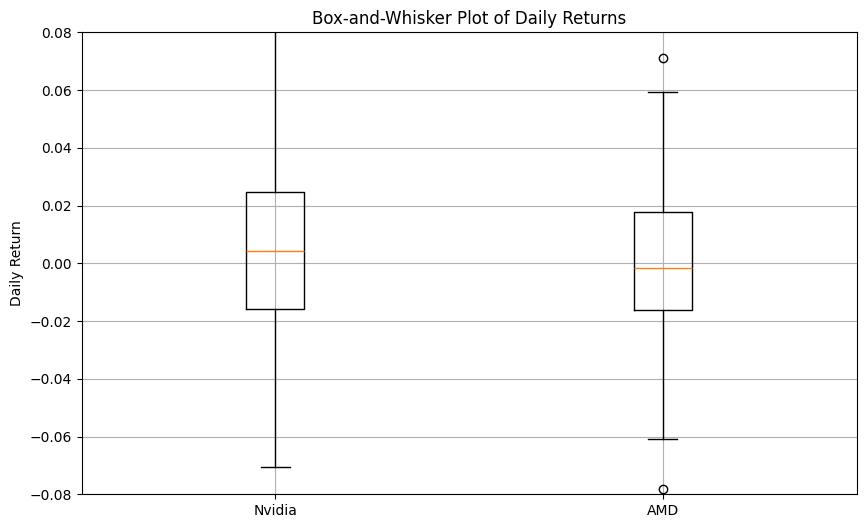

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([nvda_df['Daily Return'], amd_df['Daily Return']], tick_labels=['Nvidia', 'AMD'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.ylim(-0.08, 0.08) # Set the y-axis limits
plt.show()

Step 10: Descriptive Statistics

In [ ]:
from scipy import stats

def descriptive_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max()
    }

# Compute descriptive statistics
nvda_stats = descriptive_stats(nvda_df['Daily Return'])
amd_stats = descriptive_stats(amd_df['Daily Return'])

print("Descriptive Statistics for Nvidia (NVDA):")
for key, value in nvda_stats.items():
    print(f"{key}: {value}")

print("\nDescriptive Statistics for AMD (AMD):")
for key, value in amd_stats.items():
    print(f"{key}: {value}")

Descriptive Statistics for Nvidia (NVDA):
Mean: 0.004745599674614864
Median: 0.004089030173930808
Mode: -0.09996455157745476
Standard Deviation: 0.03309701615955455
Sample Variance: 0.001095412478665815
Kurtosis: 2.6618366840596033
Skewness: 0.3771186063815153
Range: 0.26396217909821407
Minimum: -0.09996455157745476
Maximum: 0.1639976275207593

Descriptive Statistics for AMD (AMD):
Mean: -4.359360215598551e-05
Median: -0.0015764567711795685
Mode: -0.10616541353383457
Standard Deviation: 0.030032739901218877
Sample Variance: 0.0009019654659742645
Kurtosis: 1.7292209844785433
Skewness: -0.1721381660442175
Range: 0.21311044975028115
Minimum: -0.10616541353383457
Maximum: 0.10694503621644658


Step 10: Descriptive Statistics

In [ ]:

from scipy import stats

def descriptive_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max()
    }

# Compute descriptive statistics
nvda_stats = descriptive_stats(nvda_df['Daily Return'])
amd_stats = descriptive_stats(amd_df['Daily Return'])

print("Descriptive Statistics for Nvidia (NVDA):")
for key, value in nvda_stats.items():
    print(f"{key}: {value}")

print("\nDescriptive Statistics for AMD (AMD):")
for key, value in amd_stats.items():
    print(f"{key}: {value}")


Descriptive Statistics for Nvidia (NVDA):
Mean: 0.004745599674614864
Median: 0.004089030173930808
Mode: -0.09996455157745476
Standard Deviation: 0.03309701615955455
Sample Variance: 0.001095412478665815
Kurtosis: 2.6618366840596033
Skewness: 0.3771186063815153
Range: 0.26396217909821407
Minimum: -0.09996455157745476
Maximum: 0.1639976275207593

Descriptive Statistics for AMD (AMD):
Mean: -4.359360215598551e-05
Median: -0.0015764567711795685
Mode: -0.10616541353383457
Standard Deviation: 0.030032739901218877
Sample Variance: 0.0009019654659742645
Kurtosis: 1.7292209844785433
Skewness: -0.1721381660442175
Range: 0.21311044975028115
Minimum: -0.10616541353383457
Maximum: 0.10694503621644658


Step 11: Hypothesis Testing

In [ ]:
# Hypothesis Testing: Independent t-test
t_stat, p_value = stats.ttest_ind(nvda_df['Daily Return'], amd_df['Daily Return'], equal_var=False)
print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis Testing (Independent t-test):
T-statistic: 1.6943465530919377
P-value: 0.09083052513517866


Step 12: Bar Graph with Error Bars

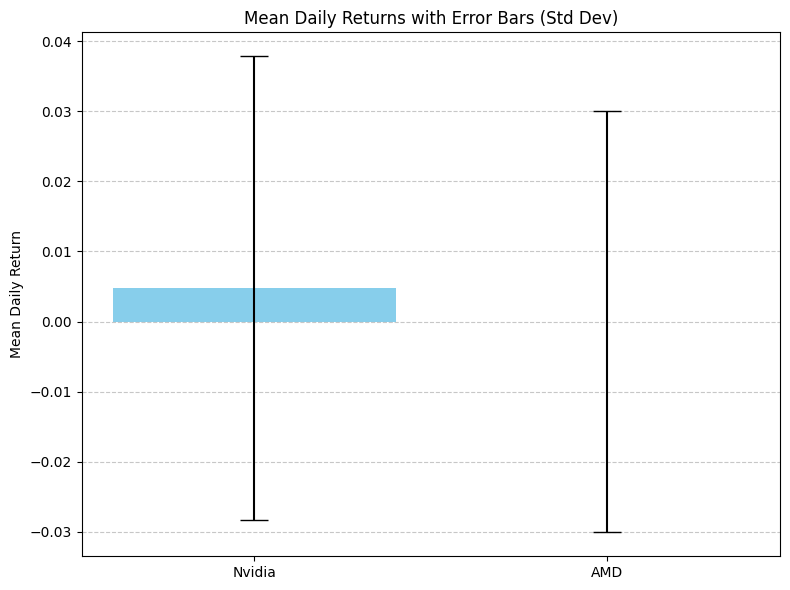

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the Excel file
file_id = '10UHOG_LRvrZj_gTzOGZa37Mrgxkd2SY7'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('/content/DATA Lab 1 - NVIDIA - AMD.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('/content/DATA Lab 1 - NVIDIA - AMD.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")


# Clean and format the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # Remove rows with missing returns

# Separate Nvidia and AMD Data
nvda_df = df[df['Ticker'] == 'NVDA'].copy()
amd_df = df[df['Ticker'] == 'AMD'].copy()

# Hypothesis Testing: Independent t-test
t_stat, p_value = stats.ttest_ind(nvda_df['Daily Return'], amd_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [nvda_df['Daily Return'].mean(), amd_df['Daily Return'].mean()]
errors = [nvda_df['Daily Return'].std(), amd_df['Daily Return'].std()]
labels = ['Nvidia', 'AMD']
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns with Error Bars (Std Dev)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation**:

The p-value > 0.05, so we fail to reject the null hypothesis.

This means there is no statistically significant difference in the average daily returns between Nvidia and AMD based on this dataset.